In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('Algerian_forest_fires_dataset.csv')

In [7]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [11]:
##data cleaning process
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [17]:
##Remove null values
df=df.dropna().reset_index(drop=True)

In [12]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       247 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.1+ KB


In [14]:
df[['Region']]=df[['Region']].astype(int)

In [18]:
df.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [19]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [22]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [21]:
df=df.drop(122).reset_index(drop=True)

In [24]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [26]:
##fix spaces
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [27]:
##change the required columns as int data type
df[['day','month','year','Temperature','RH','Ws']]=df[['day','month','year','Temperature','RH','Ws']].astype(int)

In [33]:
# Convert specified columns to float data type
columns_to_convert = ['rain', 'wind', 'ffmc', 'dmc', 'dc', 'isi', 'bui', 'fwi']
df[columns_to_convert] = df[columns_to_convert].astype(float)


KeyError: "None of [Index(['rain', 'wind', 'ffmc', 'dmc', 'dc', 'isi', 'bui', 'fwi'], dtype='object')] are in the [columns]"

In [35]:
# Correct column names to convert to float
columns_to_convert = ['Rain', 'Ws', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

# Check which columns are actually present in the DataFrame
existing_columns = [col for col in columns_to_convert if col in df.columns]

# Convert only the existing columns to float
df[existing_columns] = df[existing_columns].astype(float)


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    float64
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(8), int64(6), object(1)
memory usage: 28.6+ KB


In [38]:
##lets save the cleaned dataset
df.to_csv('Algerian_forest_fires_cleaned_dataset.csv',index=False)

# **Exploratory data Analysis**

In [53]:
df_copy=df.drop(['day','month','year'],axis=1)

In [54]:
df_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [55]:
print(df_copy['Classes'].dtype)


object


In [56]:
##encoding of categores in classes
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)


In [57]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [58]:
##categories in classes
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

<ipython-input-59-54ded87066c3>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

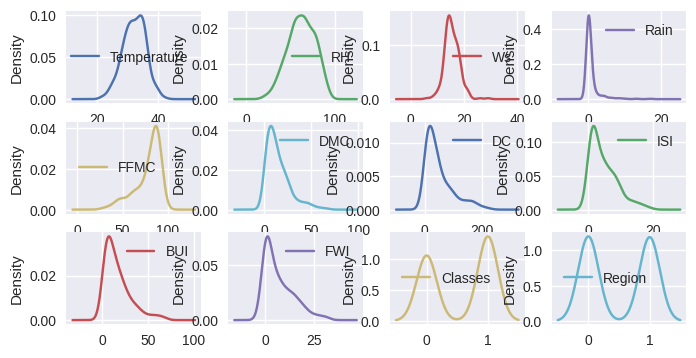

In [59]:
##plot density plot for all features
plt.style.use('seaborn')
df_copy.plot(kind='density',subplots=True,layout=(4,4),sharex=False)

In [60]:
##Percentage for pie chart
df_copy['Classes'].value_counts(normalize=True)*100

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

([<matplotlib.patches.Wedge at 0x7a79e4b9f010>,
 [Text(-0.21895639684834634, 1.0779879852202388, 'Not Fire'),
  Text(0.21895649777686463, -1.0779879647200568, 'Fire')],
 [Text(-0.1194307619172798, 0.5879934464837665, '56.4%'),
  Text(0.11943081696919887, -0.587993435301849, '43.6%')])

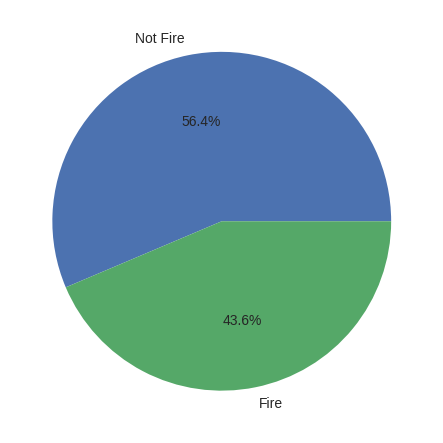

In [63]:
##plotting piecahrt
classlables=['Not Fire','Fire']
plt.figsize=(12,7)
plt.pie(df_copy['Classes'].value_counts(),labels=classlables,autopct='%1.1f%%')

In [65]:
##corelation
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

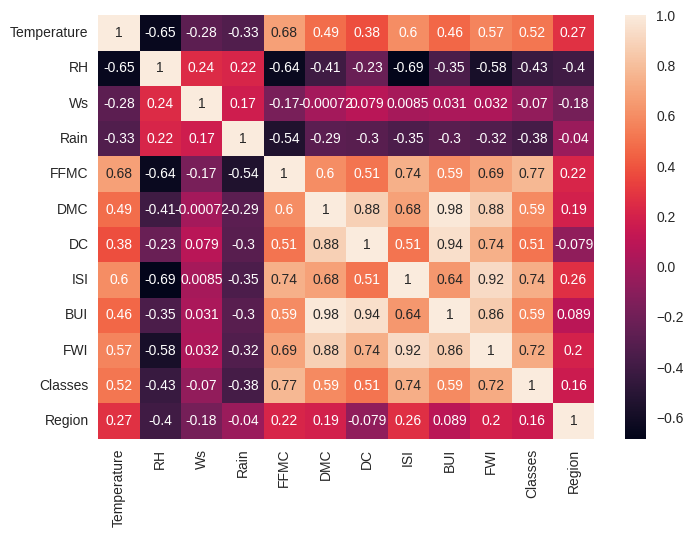

In [66]:
sns.heatmap(df_copy.corr(),annot=True)

<Axes: >

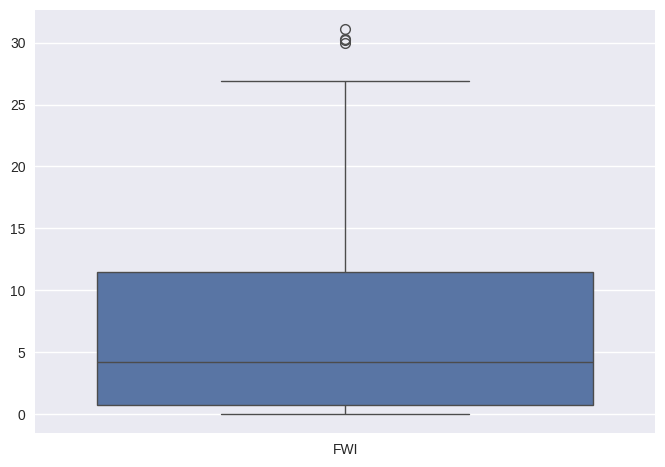

In [71]:
# Create box plots for multiple columns
sns.boxplot(data=df[['FWI']])


In [72]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [76]:
##encoding of categores in classes
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)


Text(0.5, 1.0, 'Monthly fire analysis of Sidi-Bel Region ')

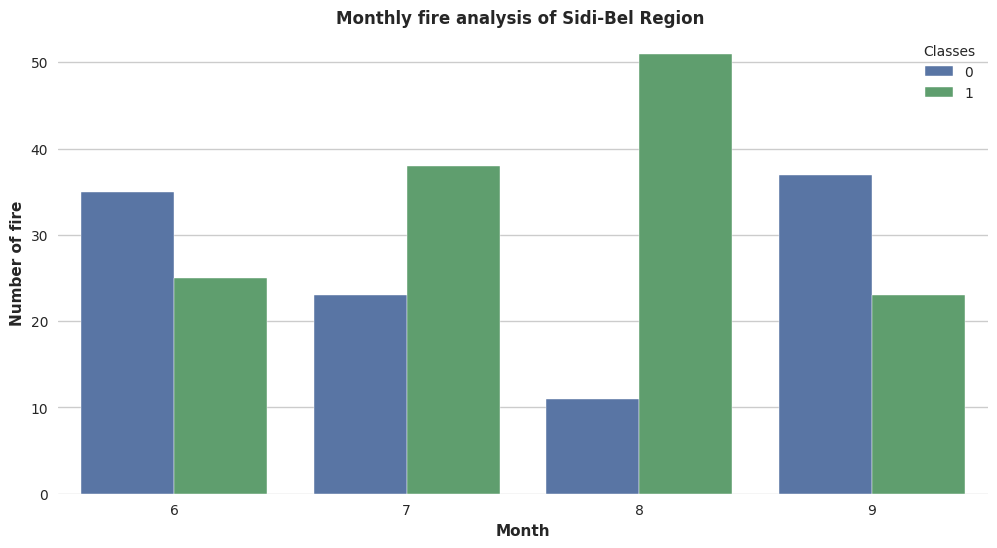

In [80]:
##monthly fire analysis
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(12,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of fire',weight='bold')
plt.xlabel('Month',weight='bold')
plt.title('Monthly fire analysis of Sidi-Bel Region ',weight='bold')

Text(0.5, 1.0, 'Monthly fire analysis of djaya Region ')

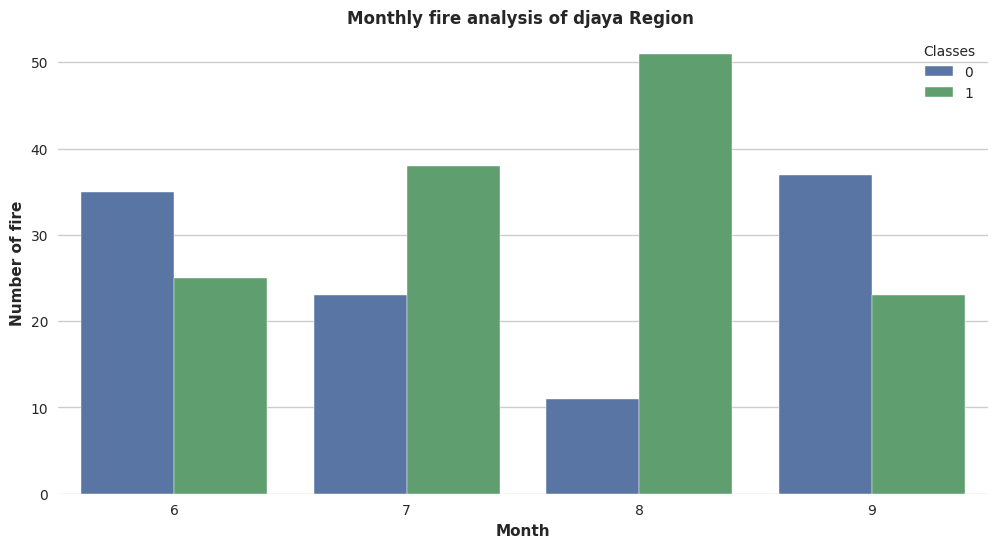

In [81]:
##monthly fire analysis
dftemp=df.loc[df['Region']==0]
plt.subplots(figsize=(12,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of fire',weight='bold')
plt.xlabel('Month',weight='bold')
plt.title('Monthly fire analysis of djaya Region ',weight='bold')

# MODEL TRAINING
